In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import check_random_state

fig_dir = './figures/'

viewing_angles = (40, -60)

In [2]:
def label_axes(voxels, offset=.5, no_grid_lines=True):
    
    x_ticks = ['(1, {})'.format(i) for i in range(1, voxels.shape[0] + 1)]
    y_ticks = ['(2, {})'.format(i) for i in range(1, voxels.shape[1] + 1)]
    z_ticks = ['(3, {})'.format(i) for i in range(1, voxels.shape[2] + 1)]
    plt.xticks(np.arange(voxels.shape[0]) + offset, x_ticks);
    plt.yticks(np.arange(voxels.shape[1]) + offset, y_ticks);
    plt.gca().set_zticks(np.arange(voxels.shape[2]) + offset)
    plt.gca().set_zticklabels(z_ticks)
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.gca().set_zlabel('Axis 3')
    
    plt.xlim(0, voxels.shape[0])
    plt.ylim(0, voxels.shape[1])
    plt.gca().set_zlim(0, voxels.shape[2])
    
    
    if no_grid_lines:
        ax = plt.gca()
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
   #  plt.ylim(0, 0)


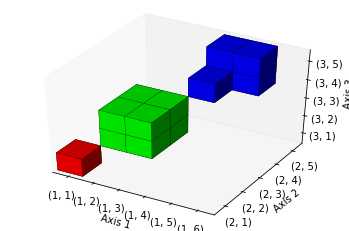

In [3]:

# prepare some coordinates
x, y, z = np.indices((6, 5, 5))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x == 0) & (y == 0) & (z == 0)

cube2 = (x >= 1) & (x <= 2) & \
        (y >= 1) & (y <= 2) & \
        (z >= 1) & (z <= 2)


cube3 = (x >= 3) & (x <= 4) & \
        (y >= 3) & (y <= 4) & \
        (z >= 3) & (z <= 4)

cube3[4, 3, :] = False
# cube3[4, 4, 4] = False
cube3[3, 3, 4] = False

# line = np.zeros_like(cube1).astype(bool)
# line[4, 3, :] = True

# combine the objects into a single boolean array
voxels = cube1 | cube2 | cube3 

# set the colors of each object
# colors = np.empty(voxels.shape, dtype=object)
# colors[cube1] = 'red'
# colors[cube2] = 'blue'
# colors[cube3] = 'green'
# if hilight_isolated_vertex:
#     colors[line] = 'grey'

colors = np.empty(voxels.shape + (4,))
colors[cube1] = [1, 0, 0, 1]
colors[cube2] = [0, 1, 0, 1]
colors[cube3] = [0, 0, 1, 1]

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k', linewidths=.2)

label_axes(voxels)

# default: 30, -60
ax.view_init(*viewing_angles)

plt.savefig(fig_dir + 'block_diag_multiarray.png', bbox_inches='tight', dpi=100)

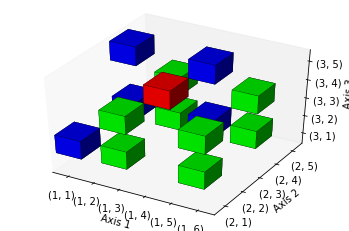

In [4]:
rng = check_random_state(36)

x_perm = rng.permutation(np.arange(voxels.shape[0]))
y_perm = rng.permutation(np.arange(voxels.shape[1]))
z_perm = rng.permutation(np.arange(voxels.shape[2]))

voxels_perm = voxels[x_perm, :, :][:, y_perm, :][:, :, z_perm]
colors_perm = colors[x_perm, :, :][:, y_perm, :][:, :, z_perm]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels_perm, facecolors=colors_perm, edgecolor='k', linewidths=.2)
label_axes(voxels)
ax.view_init(*viewing_angles)

plt.savefig(fig_dir + 'block_diag_multiarray_perm.png', bbox_inches='tight', dpi=100)

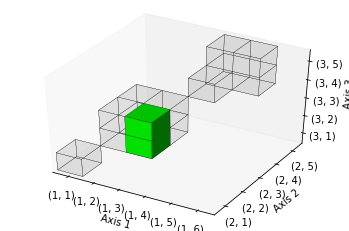

In [5]:
colors = np.empty(voxels.shape + (4,))

colors[cube1] = [0, 0, 0, .05]
colors[cube2] = [0, 0, 0, .05]
colors[cube3] = [0, 0, 0, .05]
colors[2, 1, 2] = [0, 1, 0, 1]
colors[2, 1, 1] = [0, 1, 0, 1]

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k', linewidths=.2)

label_axes(voxels)

ax.view_init(*viewing_angles)

plt.savefig(fig_dir + 'multiarray_edge_summing.png', bbox_inches='tight', dpi=100)

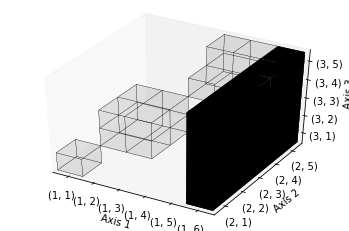

In [6]:
zero_slice = np.zeros_like(cube1).astype(bool)
zero_slice[5, :, :] = True
voxels = voxels | zero_slice

colors = np.empty(voxels.shape + (4,))

colors[cube1] = [0, 0, 0, .05]
colors[cube2] = [0, 0, 0, .05]
colors[cube3] = [0, 0, 0, .05]
colors[zero_slice] = [0, 0, 0, 1]


# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k', linewidths=.2)

label_axes(voxels)

ax.view_init(*viewing_angles)

plt.savefig(fig_dir + 'multiarray_isolated_vertex.png', bbox_inches='tight', dpi=100)